## 20-30대 (다운샘플링x)

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

df = pd.read_csv('Loan.csv')  # 데이터 불러오기
df = df.drop('ApplicationDate',axis=1)
# 1. LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})
# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]


# 수치형 데이터를 범주형 데이터로 변환
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


# 각 수치형 컬럼에 대해 그룹 나누기
for col in numeric_columns:
    # 해당 컬럼의 데이터를 오름차순으로 정렬
    sorted_values = np.sort(df[col].values)

    # 각 컬럼의 길이를 4로 나누어서 인덱스 분배
    group_size = len(sorted_values) // 4

    # 4등분한 구간의 인덱스를 구하고, 해당 구간에 값을 할당
    group_labels = np.concatenate([
        np.full(group_size, '1'),  # 1그룹
        np.full(group_size, '2'),  # 2그룹
        np.full(group_size, '3'),  # 3그룹
        np.full(len(sorted_values) - 3 * group_size, '4')  # 4그룹 (나머지)
    ])

    # 그룹을 다시 원본 데이터프레임에 할당
    df[col] = group_labels

# 수치형 변수의 범주화된 컬럼에 대해 원핫 인코딩을 적용
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
one_hot_df = pd.get_dummies(df[categorical_columns], prefix_sep='=', drop_first= False)

# 범주형 변수를 원핫인코딩한 후 연관 규칙을 찾음
frequent_itemsets = apriori(one_hot_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.0,num_itemsets=7)

#support 값으로 내림차순
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
# 'lift' 값으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 결과 출력
print("Frequent Itemsets:")
print(sorted_frequent_itemsets)

print("\nAssociation Rules:")
print(sorted_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0   0.847248                        (EmploymentStatus=Employed)
7   0.806893                         (LoanApproved=NotApproved)
10  0.682157  (LoanApproved=NotApproved, EmploymentStatus=Em...
2   0.498054                            (MaritalStatus=Married)
8   0.422346  (MaritalStatus=Married, EmploymentStatus=Emplo...
11  0.401001  (MaritalStatus=Married, LoanApproved=NotApproved)
4   0.393552                     (HomeOwnershipStatus=Mortgage)
13  0.339633  (MaritalStatus=Married, LoanApproved=NotApprov...
9   0.333185  (HomeOwnershipStatus=Mortgage, EmploymentStatu...
12  0.313174  (HomeOwnershipStatus=Mortgage, LoanApproved=No...
3   0.313063                             (MaritalStatus=Single)
6   0.302279                                 (LoanPurpose=Home)
5   0.301834                         (HomeOwnershipStatus=Rent)
1   0.300167                          (EducationLevel=Bachelor)

Association Rules:
 

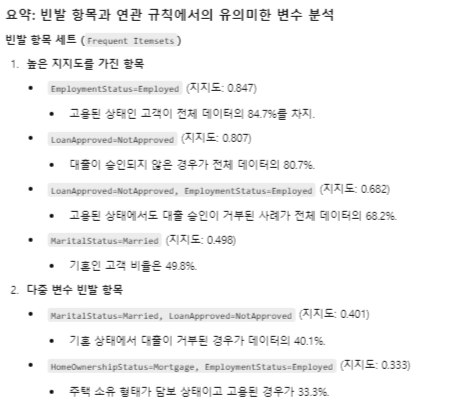

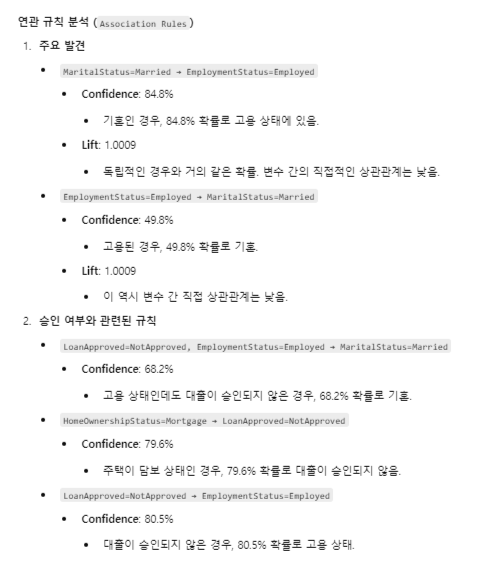

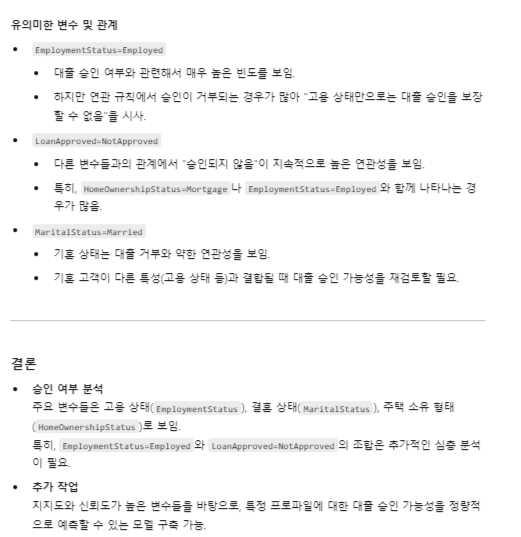

## 다운샘플링

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from sklearn.utils import resample
df = pd.read_csv('Loan.csv')  # 데이터 불러오기
df = df.drop('ApplicationDate',axis=1)
# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]

# 1. 각 클래스별 데이터 분리
approved_df = df[df['LoanApproved'] == 1]
not_approved_df = df[df['LoanApproved'] == 0]

# 2. 소수 클래스 수에 맞춰 다운샘플링
min_count = min(len(approved_df), len(not_approved_df))

approved_downsampled = resample(approved_df,
                                replace=False,  # 복원 추출 여부
                                n_samples=min_count,  # 소수 클래스 샘플 수
                                random_state=42)

not_approved_downsampled = resample(not_approved_df,
                                    replace=False,
                                    n_samples=min_count,
                                    random_state=42)

# 3. 다운샘플링된 데이터 합치기
balanced_df = pd.concat([approved_downsampled, not_approved_downsampled])

# 4. 데이터 섞기 (선택 사항)
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 1. LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})



# 수치형 데이터를 범주형 데이터로 변환
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


# 각 수치형 컬럼에 대해 그룹 나누기
for col in numeric_columns:
    # 해당 컬럼의 데이터를 오름차순으로 정렬
    sorted_values = np.sort(df[col].values)

    # 각 컬럼의 길이를 4로 나누어서 인덱스 분배
    group_size = len(sorted_values) // 4

    # 4등분한 구간의 인덱스를 구하고, 해당 구간에 값을 할당
    group_labels = np.concatenate([
        np.full(group_size, '1'),  # 1그룹
        np.full(group_size, '2'),  # 2그룹
        np.full(group_size, '3'),  # 3그룹
        np.full(len(sorted_values) - 3 * group_size, '4')  # 4그룹 (나머지)
    ])

    # 그룹을 다시 원본 데이터프레임에 할당
    df[col] = group_labels

# 수치형 변수의 범주화된 컬럼에 대해 원핫 인코딩을 적용
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
one_hot_df = pd.get_dummies(df[categorical_columns], prefix_sep='=', drop_first= False)

# 범주형 변수를 원핫인코딩한 후 연관 규칙을 찾음
frequent_itemsets = apriori(one_hot_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.1,num_itemsets=2)

#support 값으로 내림차순
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
# 'lift' 값으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 결과 출력
print("Frequent Itemsets:")
print(sorted_frequent_itemsets)

print("\nAssociation Rules:")
print(sorted_rules)

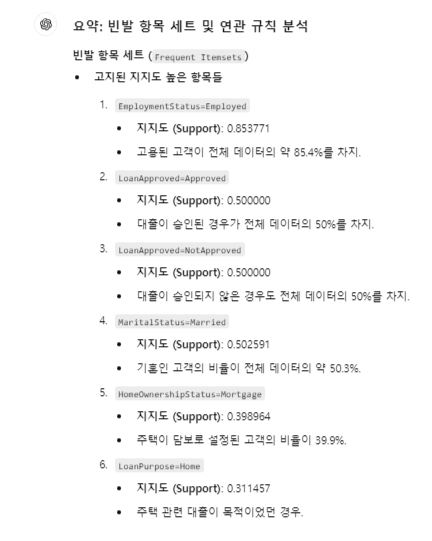

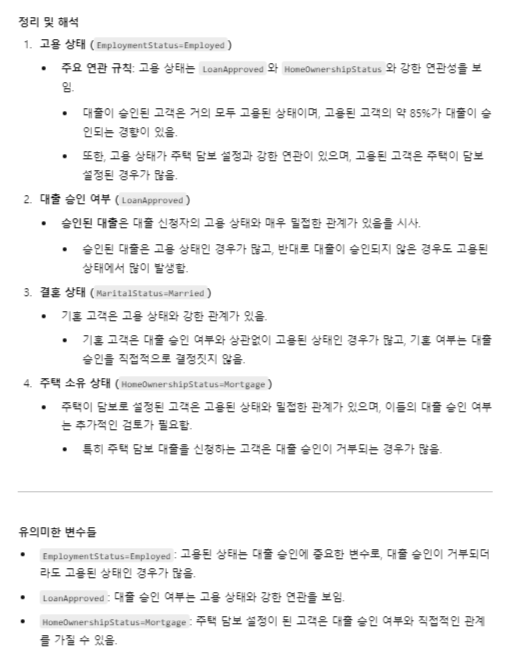